In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"dataset\athlete_events.csv")
region_df = pd.read_csv(r"dataset\noc_regions.csv")

In [4]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
df.shape

(271116, 15)

In [6]:
df = df[df['Season']=="Summer"]

In [7]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
193569,97156,"Austin Martin ""Gus"" Prokop",M,27.0,NaN,NaN,United States,USA,1948 Summer,1948,Summer,London,Fencing,"Fencing Men's Foil, Team",NaN
133782,67367,Kevin Edmund Lawton,M,23.0,186.0,88.0,New Zealand,NZL,1984 Summer,1984,Summer,Los Angeles,Rowing,Rowing Men's Coxed Fours,Bronze
18847,9985,Sofiane Bendebka,M,23.0,170.0,65.0,Algeria,ALG,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,NaN
45091,23255,Claudia Coslovich,F,32.0,170.0,74.0,Italy,ITA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN
40121,20633,Chiang Tai-Chuan,M,31.0,174.0,77.0,Chinese Taipei,TPE,1992 Summer,1992,Summer,Barcelona,Baseball,Baseball Men's Baseball,Silver


In [8]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [9]:
df=df.merge(region_df,on='NOC',how='left')

In [10]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
95898,58862,Marie-Jos Kersaudy,F,14.0,165.0,46.0,France,FRA,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 800 metres Freestyle,NaN,France,NaN
216071,131635,Aman Wote Fete,M,28.0,183.0,68.0,Ethiopia,ETH,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN,Ethiopia,NaN
149845,91492,Park Gyeong-A,F,18.0,154.0,49.0,South Korea,KOR,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Uneven Bars,NaN,South Korea,NaN
164739,100547,Marcia Maureen Richardson (-Bailey),F,28.0,171.0,62.0,Great Britain,GBR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,UK,NaN
115631,70774,Harald Axel Fredrik Ljung,M,24.0,NaN,NaN,Sweden,SWE,1908 Summer,1908,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Sweden,NaN


In [11]:
df['region'].value_counts().shape

(205,)

In [12]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(1385)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

### Medal One-Hot Encoding

In [17]:
dummies = pd.get_dummies(df['Medal'],dtype=int)

In [18]:
df.shape

(221167, 17)

### concat horizontally

In [19]:
df = pd.concat([df, dummies], axis=1)

In [20]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


There is a data discrepancy , with the realistic medal tally available on wikipedia. USA has around 1000+ gold whereas our data shows 2.4k+. Realized that for team events like hockey it should be one gold medal but our data is counting each gold medal per member in team . Hockey 1982 India won Gold it should count as one but it counts gold by athlete Name . 11 players of 1982 hockey shows 11 gold medal instead of 1.

In [21]:
df[(df['NOC'] == "IND") & (df['Medal'] == "Gold")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


Dropping duplicates based on columns Team,NOC,Games,Year,City.Sport,Event,Medal--> where ever these columns value same we drop 

In [22]:
medal_tally = df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])

In [23]:
# medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [24]:
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

The ranking is correct due to some expection we have variation in tally 

In [26]:
medal_tally

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287
...,...,...,...,...
200,Vanuatu,0,0,0
201,"Virgin Islands, British",0,0,0
202,"Virgin Islands, US",0,1,0
203,Yemen,0,0,0


In [27]:
# medal_tally[medal_tally['NOC']=="IND"]

In [28]:
medal_tally['total'] =medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [29]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Vanuatu,0,0,0,0
201,"Virgin Islands, British",0,0,0,0
202,"Virgin Islands, US",0,1,0,1
203,Yemen,0,0,0,0


In [30]:
years=df['Year'].unique().tolist()

In [31]:
years.sort()

In [32]:
years.insert(0,'Overall')

In [33]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [34]:
country = df['region'].unique().tolist()
## it has one nan so can't sort

In [35]:
country= np.unique(df['region'].dropna().values).tolist()

In [36]:
country.sort()

In [37]:
country.insert(0,'Overall')

In [38]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [39]:
medal_df = df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])

In [40]:
def fetch_medal_tally(years,country):
    flag = 0
    if years == "Overall" and country == "Overall":
        temp_df = medal_df
    if years =="Overall" and country != "Overall":
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if years !="Overall" and country == "Overall":
        temp_df = medal_df[medal_df['Year'] == int(years)] 
    if years !="Overall" and country != "Overall":
        temp_df = medal_df[(medal_df['Year']== years) & (medal_df['region']== country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

In [41]:
medal_df[(medal_df['Year']== 2016) & (medal_df['region']== 'India')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1015,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,0,0,0
7065,4523,Seema Antil,F,33.0,182.0,92.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,0,0,0
8713,5562,Aditi Ashok,F,18.0,173.0,57.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN,0,0,0
9202,5868,Manu Attri,M,23.0,172.0,73.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN,0,0,0
10070,6427,Lalita Shivaji Babar,F,27.0,166.0,50.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182260,111467,Sathish Kumar Sivalingam,M,24.0,175.0,77.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,NaN,India,NaN,0,0,0
195568,119515,Shiva Thapa,M,22.0,169.0,56.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,India,NaN,0,0,0
198042,120871,Sandeep Tomar,M,25.0,168.0,61.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,India,NaN,0,0,0
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,0,0,0


In [42]:
fetch_medal_tally(years='Overall',country='Overall')

                      region  Gold  Silver  Bronze  total
0                        USA  1035     802     708   2545
1                     Russia   592     498     487   1577
2                    Germany   444     457     491   1392
3                         UK   278     317     300    895
4                     France   234     256     287    777
..                       ...   ...     ...     ...    ...
200                  Vanuatu     0       0       0      0
201  Virgin Islands, British     0       0       0      0
202       Virgin Islands, US     0       1       0      1
203                    Yemen     0       0       0      0
204                   Zambia     0       1       1      2

[205 rows x 5 columns]


In [43]:
fetch_medal_tally(years=2016,country='India')

  region  Gold  Silver  Bronze  total
0  India     0       1       1      2


In [44]:
fetch_medal_tally(years=2016,country='Overall')

                      region  Gold  Silver  Bronze  total
0                        USA    46      37      38    121
1                         UK    27      23      17     67
2                      China    26      18      26     70
3                     Russia    19      17      20     56
4                    Germany    17      10      15     42
..                       ...   ...     ...     ...    ...
198  Virgin Islands, British     0       0       0      0
199       Virgin Islands, US     0       0       0      0
200                    Yemen     0       0       0      0
201                   Zambia     0       0       0      0
202                 Zimbabwe     0       0       0      0

[203 rows x 5 columns]


In [45]:
fetch_medal_tally(years=2016,country='USA')

  region  Gold  Silver  Bronze  total
0    USA    46      37      38    121


In [46]:
fetch_medal_tally(years='Overall',country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


Changed when overall years and country specific we will see all years tally instead summary

In [47]:
fetch_medal_tally(years='Overall',country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


### Overall Analysis

In [48]:
# no. of edition 
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [49]:
#no. of editions 

df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896])

#### Ioc didn't recognized Athens 1906 olympic games and does not regard any events occuring there such as new records or winning medals . total 28 olympic so far 

In [50]:
df['Year'].unique().shape[0]-1

28

In [51]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [52]:
df['City'].unique().shape[0]-1

22

In [53]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [54]:
df['Event'].unique().shape

(651,)

In [55]:
df['Name'].unique().shape

(116122,)

In [56]:
df['region'].unique().shape

(206,)

In [57]:
## Participating nations over time
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [58]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [59]:
nations_over_time.head()

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22


In [112]:
!pip install plotly

  Using cached narwhals-2.2.0-py3-none-any.whl.metadata (11 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.8 MB 11.2 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.8 MB 8.4 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.8 MB 8.2 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/9.8 MB 7.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 7.3 MB/s eta 0:00:00
Using cached narwhals-2.2.0-py3-none-any.whl (401 kB)


In [60]:
import plotly.express as px

In [61]:
fig = px.line(nations_over_time,x='Year',y='count')
fig.show()

In [62]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().sort_index().reset_index()
nations_over_time.columns = ['Year','No of Countries']
fig = px.line(nations_over_time, x="Year", y="No of Countries", markers=True)
fig.show()

In [63]:
nations_over_time = df.drop_duplicates(['Year','Event'])['Year'].value_counts().sort_index().reset_index()
nations_over_time.columns = ['Year','Event']
fig = px.line(nations_over_time, x="Year", y="Event", markers=True)
fig.show()

In [64]:
nations_over_time = df.drop_duplicates(['Year','Name'])['Year'].value_counts().sort_index().reset_index()
nations_over_time.columns = ['Year','Name']
fig = px.line(nations_over_time, x="Year", y="Name", markers=True)
fig.show()

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
x=df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

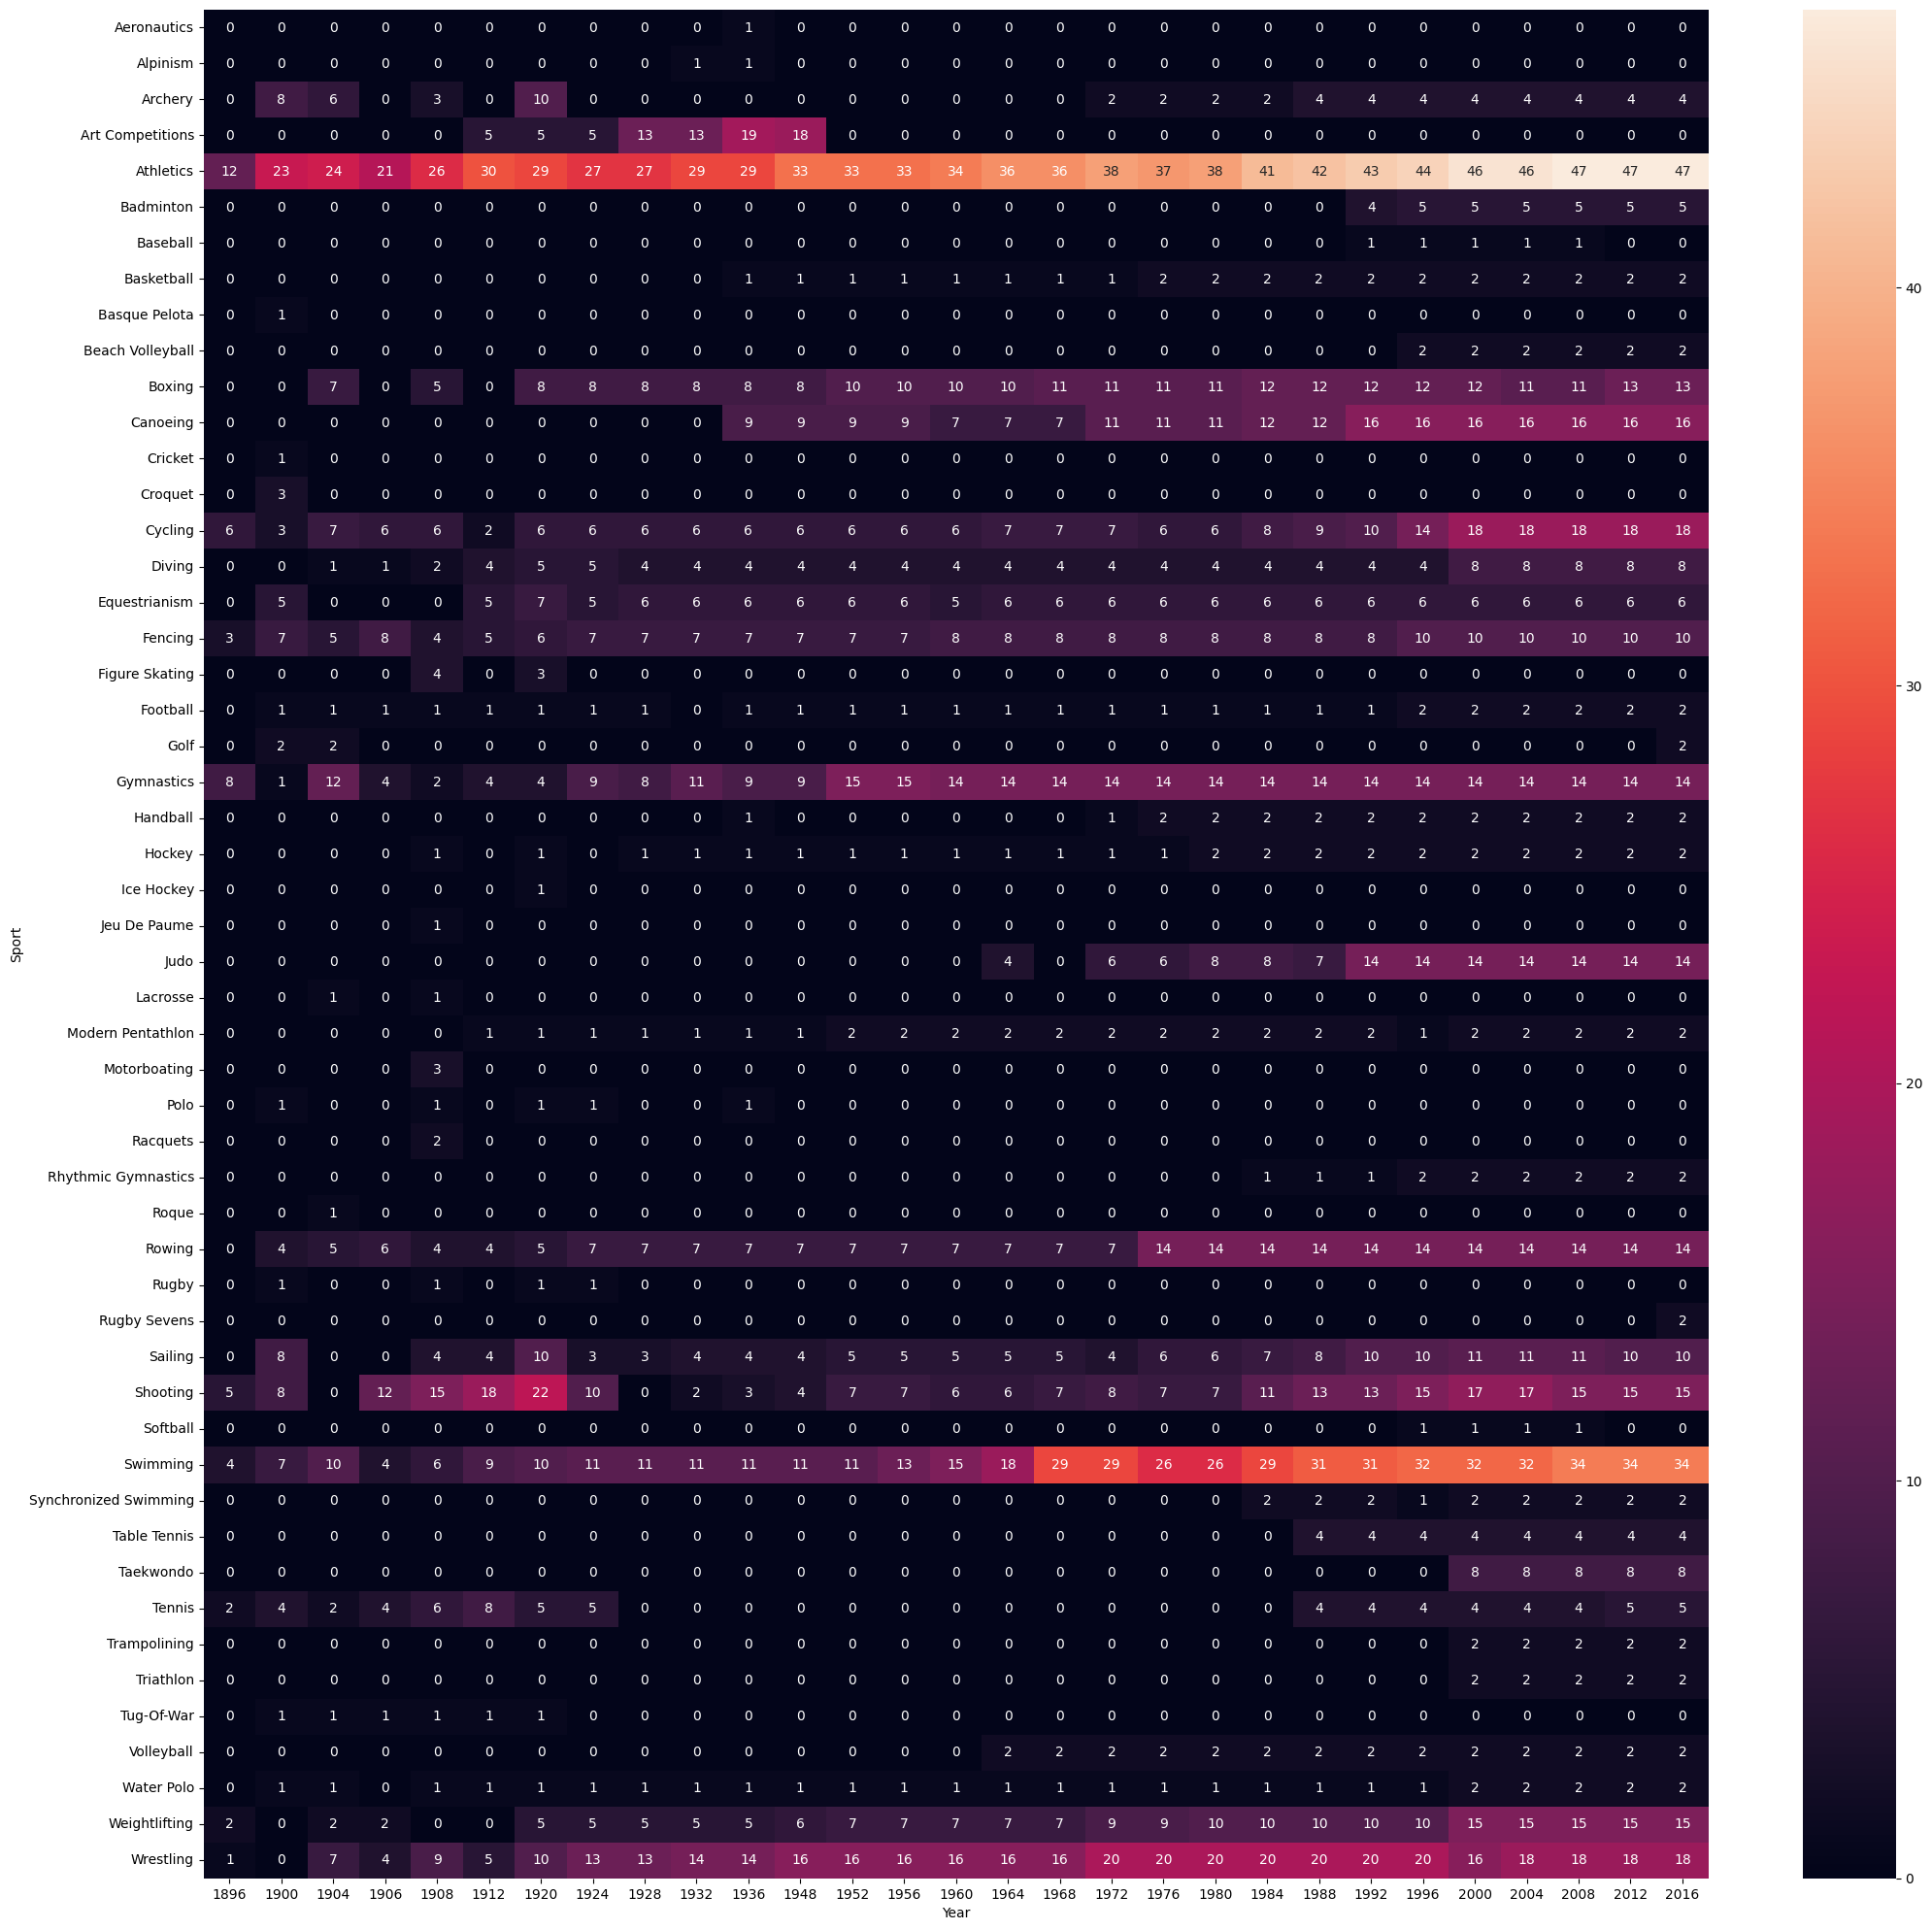

In [67]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [68]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [69]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [117]:
df.dropna(subset=['Medal'])['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')

,Name,count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Birgit Fischer-Schmidt,12,Canoeing,Germany
170,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
187,Ryan Steven Lochte,12,Swimming,USA


In [121]:
def most_successful(df,Sport):
    temp_df = df.dropna(subset=['Medal'])

    if Sport !='Overall':
        temp_df= temp_df[temp_df['Sport']== Sport]

    x=temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on ='Name',right_on='Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')
    x.rename(columns={'count':'Medal_Count','region':'Country'},inplace=True)
    return x


In [122]:
most_successful(df,'Gymnastics')

,Name,Medal_Count,Sport,Country
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia
195,Polina Hryhorivna Astakhova,10,Gymnastics,Russia
